# "Lagrange Points"

The purpose of this project was to find the Lagrange points of the Earth-Moon system, and model what the orbit looks like with these points included. 

For the purposes of this project, the Lagrange points are determined as exactly five points located around a pair or  celestial bodies. They are located in places where the net gravitational force acting upon the point is exactly zero. 

To start, we need to have a working set of equations to use to find where these point should be exactly in the Earth-Moon system. In this reference frame, we can start with the center of mass and what the gravitational potential is at that point. This will require some math to figure out what what that center of mass value should be. The equation for the gravitational potential is given as:

$$V=-\frac{GM}{r_E} - \frac{Gm}{r_m} - \tfrac12 r^2 \omega^2\,$$

where:
- $G=6.674\times10^{-11}$ (Gravitational Constant)
- $M=5.974\times10^{24}$ kg (mass of the earth)
- $m=7.348\times10^{22}$ kg (mass of the moon)
- $\omega=2.662\times10^{-6}$ s$^{-1}$ (orbital angular frequency of the moon about the earth-moon system's center of mass)
- $r_E$ = radius of Earth
- $r_m$ = radius of Moon
- $r$ = radius from center of mass

The third term in this equation is the centrifugal force introduced by co-rotating coordinates. 

The first step is to create a plot of the Earth and Moon with the center of mass at the origin and with the Earth and Moon lying along the x-axis. 

Imports for this project:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize #used to find optimal Lagrange points

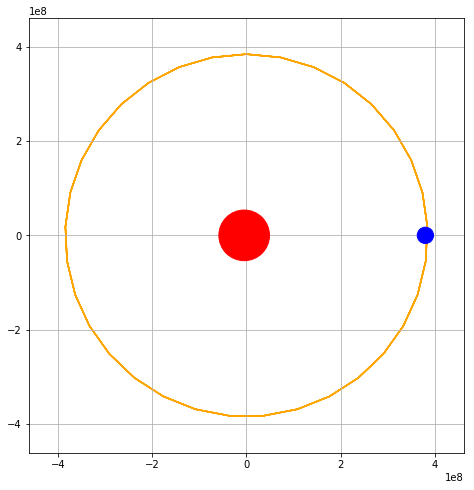

In [2]:
R = 3.844e8
x = np.linspace(-1.2*R, 1.2*R, 100)

plt.figure(figsize = (8, 8))

ax = plt.gca()
cm = plt.Circle((3.797293318e8,0), radius = 1.73e7, color="blue", zorder = 2) #order of moon and orbit
ce = plt.Circle((-4.670658192e6,0), radius = 5.37e7, color="red", zorder = 2)
plt.plot(R*np.sin(x*np.pi/2), R*np.cos(x*np.pi/2), "orange", zorder = 1) #radii come from distance from center of mass
ax.add_patch(cm)
ax.add_patch(ce)

plt.axis("scaled")
plt.ylim(-1.2*R, 1.2*R) #limits are 1.2x the moon's radius
plt.xlim(-1.2*R, 1.2*R)
plt.grid() 
plt.show()


Next step is to create a function that will be used later on for the gravitational field plot. This function represents the potential for gravity at certain places in the orbit. 


This is similar to other projects in this portfolio (check the Table of Contents for "Plotting Electric Potential") where the electric potential was plotted to visualize the electric field at certain points. For this case, we will be looking at the graivty field on a scale exponentially larger than point charges!


The functions that are going to be used for the radius of the Earth, Moon, and the radius from the center of mass are given as the Distance Formula's for their respective values

$$r = \sqrt{x^2 + y^2}\,,$$

$$r_E = \sqrt{(x-x_E)^2 + (y-y_E)^2}\,,$$

$$r_m = \sqrt{(x-x_m)^2 + (y-y_m)^2}\,$$

where $(x_E, y_E)$ and $(x_m, y_m)$ are the locations of the earth and moon as plotted in the previous part.

In [3]:
def potential(x, y):
    w = 2.662e-6
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    xe = -4.670658192e6
    xm = 3.797293318e8
    ye = 0
    ym = 0
    return -G*M/np.sqrt((x-xe)**2 + (y-ye)**2) - G*m/np.sqrt((x-xm)**2 + (y-ym)**2) - (0.5)*(x**2+y**2)*w**2


Now that a function for potential has bee defined, we can use it to make a contour plot that will accurately show gravitational levels of the system. At first, the contour will be shown in black and white to put special emphasis on where these contour lines are be drawn. A color plot showing depth to these levels will be shown later. 

There is a comparison below with the original orbit plotted earlier.

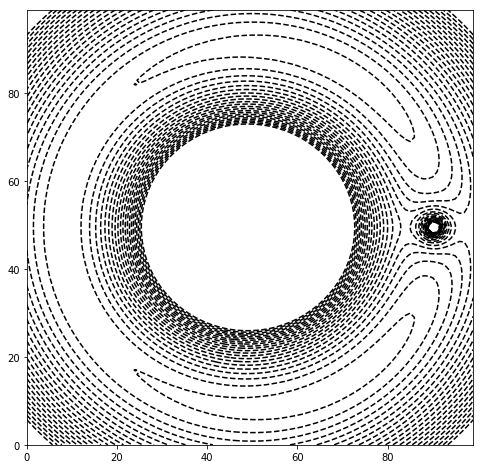

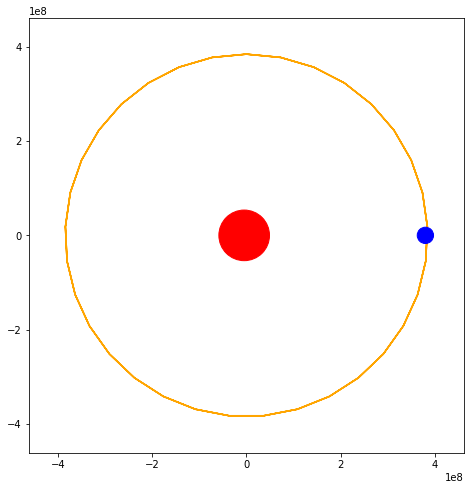

In [5]:
plt.figure(figsize = (8,8))

R = 3.844e8
x = np.linspace(-1.2*R, 1.2*R, 100)
y = np.linspace(-1.2*R, 1.2*R, 100)
xx, yy = np.meshgrid(x, y)
plt.contour(potential(xx, yy), levels=np.linspace(-2e6, 0, 100), colors = "black")

plt.figure(figsize = (8, 8))
ax = plt.gca()
cm = plt.Circle((3.797293318e8,0), radius=1.73e7, color = "blue", zorder = 3)
ce = plt.Circle((-4.670658192e6,0), radius=5.37e7, color="red", zorder = 3)
plt.plot(R*np.sin(x*np.pi/2), R*np.cos(x*np.pi/2), "orange", zorder = 2)
ax.add_patch(cm)
ax.add_patch(ce)

plt.axis("scaled")
plt.ylim(-1.2*R, 1.2*R)
plt.xlim(-1.2*R, 1.2*R)
plt.show()


It is interesting to see how the contour lines become increasingly bunched up as they approach the Earth and the Moon. This shows that the contour plot is accurate because the gravitatonal potential grows greater as you approach a celestial body with a large mass. This makes good physical sense. The closer you are too something with huge gravity, the more and more you will feel its impact. 

Finally, we can add our Lagrange points to this plot. To do this, the equation for the gravitational field is needed. This is given by: 

$$\vec{F}=-\vec{\nabla}V\,.$$

where F is equal to the negative gradient of the potential function earlier set. The Lagrange points are the five places where the magnitude of F is zero. The function defined for gradient will return the equation for the potential.

Using this function as well as a check method to locate the points, the points themselves will be saved in arrays to hold the values for plotting. 

In [8]:

def gradient(xy):
    
    x, y = xy 
    
    w = 2.662e-6
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    xe = -4.670658192e6
    xm = 3.797293318e8
    ye = 0
    ym = 0
    R = 3.844e8
    
    return np.sqrt((-G*M*(x - xe)/(((x - xe)**2 + (y - ye)**2)**(3/2)) - G*m*(x - xm)/(((x - xm)**2 + (y - ym)**2)**(3/2)) + x*w**2)**2 + (-G*M*(y - ye)/(((x - xe)**2 + (y - ye)**2)**(3/2)) - G*m*(y - ym)/(((x - xm)**2 + (y - ym)**2)**(3/2)) + y*w**2)**2)


guess1 = (3e8, 0) #estimates are needed for scipy.optimize
guess2 = (6e8, 0)
guess3 = (-4e8, 0)
guess4 = (2e8, 3e8)
guess5 = (2e8, -3e8)

a = optimize.minimize(gradient, guess1, method = "Powell") #finds the minimums of the potential using the guesses
b = optimize.minimize(gradient, guess2, method = "Powell")
c = optimize.minimize(gradient, guess3, method = "Powell")
d = optimize.minimize(gradient, guess4, method = "Powell")
e = optimize.minimize(gradient, guess5, method = "Powell")

L1 = a.x
L2 = b.x
L3 = c.x
L4 = d.x
L5 = e.x


Finally, its time to see the results of the work for this project. We can now finally plot the Earth-Moon system accurately and with the Lagrange Points, as well as a map for visualzing the gravitational field. 

The contour map will now be shown in color to fully exemplify the magnitudes and depth of the field and is more accurate than a regular grayscale color plot. 

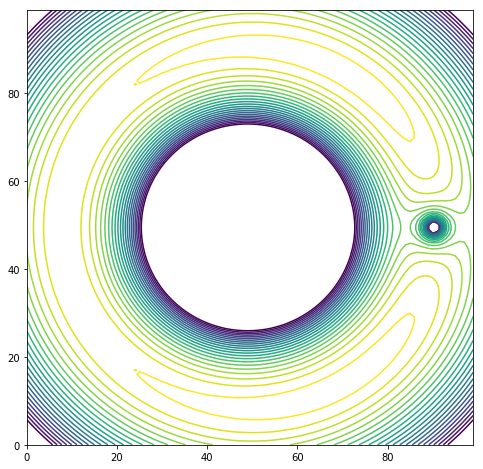

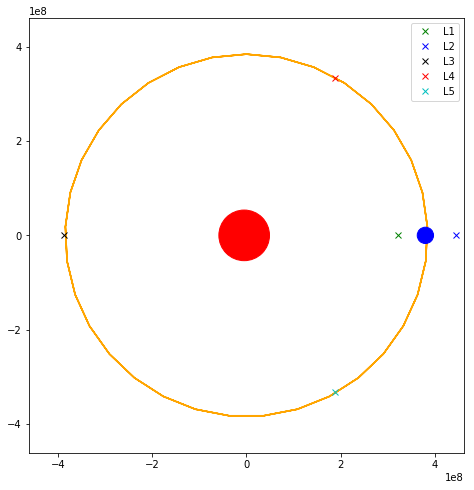

In [10]:
plt.figure(figsize = (8, 8))

R = 3.844e8
x = np.linspace(-1.2*R, 1.2*R, 100)
y = np.linspace(-1.2*R, 1.2*R, 100)
X, Y = np.meshgrid(x, y)

plt.contour(potential(X, Y), levels = np.linspace(-2e6, 0 ,100), zorder = 1)
plt.figure(figsize = (8, 8))

ax = plt.gca()
cm = plt.Circle((3.797293318e8, 0), radius = 1.73e7, color = "blue", zorder = 3)
ce = plt.Circle((-4.670658192e6, 0), radius = 5.37e7, color = "red", zorder = 3)
plt.plot(R*np.sin(x*np.pi/2), R*np.cos(x*np.pi/2), "orange", zorder = 2)
plt.plot(L1[0], L1[1], "gx", label = "L1") #plots each of the points with a different color from the arrays previously defined for them
plt.plot(L2[0], L2[1], "bx", label = "L2")
plt.plot(L3[0], L3[1], "kx", label = "L3")
plt.plot(L4[0], L4[1], "rx", label = "L4")
plt.plot(L5[0], L5[1], "cx", label = "L5")
ax.add_patch(cm)
ax.add_patch(ce)

plt.axis("scaled")
plt.ylim(-1.2*R, 1.2*R)
plt.xlim(-1.2*R, 1.2*R)
plt.legend()
plt.show()

# To Summarize:

In this project, an accurate model of an Earth-Moon system was devised along with its corresponding Lagrange points. Contour maps were able to show the depth of the gravitational field and proficency was shown in relaying space physics into python code 

Here's a link to learn more about
[Lagrange points](https://en.wikipedia.org/wiki/Lagrangian_point)